# Assignment 3

In [1]:
#imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd

# choose data
path = 'data_200.csv'
#path = 'data_500.csv'
#path = 'data_all.csv'

## 1: scatter plot

    residue name  position chain         phi         psi
0            LYS        10     A -149.312855  142.657714
1            PRO        11     A  -44.283210  136.002076
2            LYS        12     A -119.972621 -168.705263
3            LEU        13     A -135.317212  137.143523
4            LEU        14     A -104.851467   95.928520
..           ...       ...   ...         ...         ...
195          PRO        79     B  -71.600738  103.019357
196          ASN        80     B -117.344116 -171.381087
197          GLU        81     B  -58.980706  -33.448038
198          GLU        82     B  -63.693567  -13.144626
199          CYS        83     B -102.011838   -6.039254

[200 rows x 5 columns]


,phi,psi
0,-149.312855,142.657714
1,-44.283210,136.002076
2,-119.972621,-168.705263
3,-135.317212,137.143523
4,-104.851467,95.928520
...,...,...
195,-71.600738,103.019357
196,-117.344116,-171.381087
197,-58.980706,-33.448038
198,-63.693567,-13.144626


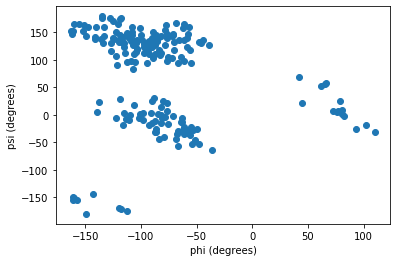

In [4]:
# read data
df = pd.read_csv(path)
# print data
print(df)
# scatter plot data
x = df['phi']
y= df['psi']
X = df[['phi','psi']]
plt.scatter(x, y)
# add labels
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees)')
X

## 2: K means clustering

### 2.a: Try different k values

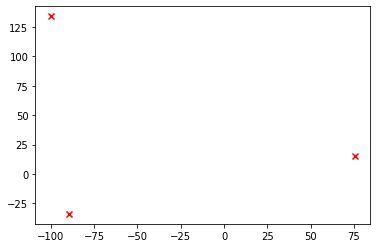

In [5]:
# create clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
# draw 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

### 2.b: Validate clusters

### 2.c: Reason about clusters in 2.a

### 2.d: Shifting data for better results

## 3: DBSCAN clustering

### 3.a: Motivate min samples & max distance

### 3.b: Visualization and outliers

### 3.c: Compare DBSCAN and k means clusters

### 3.d: Robustness of DBSCAN

## 4: Comparison of clusters